In [1]:
import pandas as pd
import numpy as np


In [7]:
df_data = pd.read_csv('./data/mlb_data.csv')
df_data

,game_id,home_team,away_team,stadium,day_or_night,home_plate_umpire,inning_1_home,inning_1_away,target,home_plate_umpire_inning1_freq,...,home_pitcher_last3_freq_1st,away_pitcher_last3_freq_1st,home_team_momentum,away_team_momentum,home_pitcher_momentum,away_pitcher_momentum,home_pitcher_vs_away_team_momentum,away_pitcher_vs_home_team_momentum,home_pitcher_dominance_vs_away_team,away_pitcher_dominance_vs_home_team
0,747060,Baltimore Orioles,Los Angeles Angels,Oriole Park at Camden Yards,Dia,Adrian Johnson,2,1,1,0.578947,...,NaN,NaN,-0.116832,0.261905,NaN,NaN,NaN,NaN,NaN,NaN
1,746737,Cincinnati Reds,Washington Nationals,Great American Ball Park,Dia,Dan Iassogna,0,0,0,0.513514,...,NaN,NaN,-0.069231,0.120755,NaN,NaN,NaN,NaN,NaN,NaN
2,745445,San Diego Padres,San Francisco Giants,Petco Park,Dia,Mark Ripperger,0,0,0,0.500000,...,NaN,NaN,0.222772,0.052381,NaN,NaN,NaN,NaN,NaN,NaN
3,746165,Los Angeles Dodgers,St. Louis Cardinals,Dodger Stadium,Dia,Alan Porter,2,0,1,0.432432,...,NaN,NaN,0.090000,0.140741,NaN,NaN,NaN,NaN,NaN,NaN
4,745116,Tampa Bay Rays,Toronto Blue Jays,Tropicana Field,Dia,Todd Tichenor,1,0,1,0.526316,...,NaN,NaN,-0.047706,0.098077,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,777921,Chicago Cubs,Miami Marlins,Wrigley Field,Noche,Ron Kulpa,0,0,0,0.222222,...,0.333333,0.000000,-0.174510,-0.145098,0.175439,-0.100000,-0.320537,-0.074510,-0.030341,0.274510
3208,777918,Texas Rangers,Colorado Rockies,Globe Life Field,Noche,Nestor Ceja,4,0,1,0.500000,...,0.333333,0.666667,0.147573,0.107692,0.183333,0.333333,-0.075641,-0.185761,-0.291026,-0.480906
3209,777920,Houston Astros,Kansas City Royals,Daikin Park,Noche,David Rackley,0,0,0,0.390244,...,NaN,0.000000,-0.147619,-0.128571,NaN,-0.142857,NaN,-0.004762,NaN,0.290476
3210,777914,San Diego Padres,Los Angeles Angels,Petco Park,Noche,John Tumpane,3,0,1,0.487179,...,0.000000,0.666667,0.222772,0.261905,-0.333333,0.500000,0.595238,-0.277228,0.071429,-0.722772


In [16]:
df_data.iloc[0][['home_team','away_team','day_or_night','home_plate_umpire','inning_1_away','inning_1_home','target']]

home_team             Baltimore Orioles
away_team            Los Angeles Angels
day_or_night                        Dia
home_plate_umpire        Adrian Johnson
inning_1_away                         1
inning_1_home                         2
target                                1
Name: 0, dtype: object

In [11]:
df_data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,game_id,inning_1_home,inning_1_away,target,home_plate_umpire_inning1_freq,stadium_inning1_freq,umpire_inning1_scaled,stadium_inning1_scaled,home_team_inning1_freq,away_team_inning1_freq,home_team_inning1_scaled,away_team_inning1_scaled,home_team_inning1_last10_freq,away_team_inning1_last10_freq,home_pitcher_true_freq,away_pitcher_true_freq,home_pitcher_vs_team_freq,away_pitcher_vs_team_freq,home_pitcher_vs_team_freq_count,away_pitcher_vs_team_freq_count,home_pitcher_last3_freq_1st,away_pitcher_last3_freq_1st,home_team_momentum,away_team_momentum,home_pitcher_momentum,away_pitcher_momentum,home_pitcher_vs_away_team_momentum,away_pitcher_vs_home_team_momentum,home_pitcher_dominance_vs_away_team,away_pitcher_dominance_vs_home_team
game_id,1.000000,0.000717,0.011800,0.019272,0.040714,0.077899,0.040714,0.077899,0.029701,-0.000938,0.029701,-0.000938,0.005222,0.028263,0.013962,-0.023624,0.000770,-0.003136,0.021286,0.044814,0.043237,0.016019,-0.005366,0.029241,0.050325,0.024860,-0.030863,-0.021951,-0.057975,-0.021271
inning_1_home,0.000717,1.000000,0.012318,0.550581,0.083373,0.080338,0.083373,0.080338,0.086944,0.002998,0.086944,0.002998,0.030487,0.012795,0.008879,0.324411,0.014886,0.689493,0.017674,0.000126,0.033596,0.475831,-0.000894,0.011819,0.027436,0.327631,-0.013532,-0.280394,-0.034970,-0.289194
inning_1_away,0.011800,0.012318,1.000000,0.516134,0.113074,0.054406,0.113074,0.054406,0.001307,0.116535,0.001307,0.116535,0.021721,0.028438,0.329089,0.015872,0.680895,0.008979,-0.056183,-0.021142,0.483547,-0.000157,0.020706,-0.019277,0.357253,-0.011473,-0.322365,0.013588,-0.306095,0.006370
target,0.019272,0.550581,0.516134,1.000000,0.181003,0.127318,0.181003,0.127318,0.065161,0.092482,0.065161,0.092482,0.026154,0.029163,0.217560,0.254929,0.531036,0.576406,-0.021199,-0.004715,0.386026,0.391023,0.002551,-0.008565,0.305000,0.279674,-0.269931,-0.243477,-0.266721,-0.242749
home_plate_umpire_inning1_freq,0.040714,0.083373,0.113074,0.181003,1.000000,0.009671,1.000000,0.009671,0.009137,0.014791,0.009137,0.014791,0.038793,0.017744,0.032852,0.062909,0.114173,0.081483,0.000548,0.000911,0.082777,0.075107,0.034585,0.011983,0.083967,0.041931,-0.063707,-0.021470,-0.084260,-0.051384
stadium_inning1_freq,0.077899,0.080338,0.054406,0.127318,0.009671,1.000000,0.009671,1.000000,0.548510,0.000037,0.548510,0.000037,0.084954,-0.003103,0.190423,0.020962,0.082066,0.064262,-0.041495,-0.023002,0.093379,0.051301,-0.110276,-0.003183,-0.013179,0.032760,0.006419,-0.084273,0.016882,0.027155
umpire_inning1_scaled,0.040714,0.083373,0.113074,0.181003,1.000000,0.009671,1.000000,0.009671,0.009137,0.014791,0.009137,0.014791,0.038793,0.017744,0.032852,0.062909,0.114173,0.081483,0.000548,0.000911,0.082777,0.075107,0.034585,0.011983,0.083967,0.041931,-0.063707,-0.021470,-0.084260,-0.051384
stadium_inning1_scaled,0.077899,0.080338,0.054406,0.127318,0.009671,1.000000,0.009671,1.000000,0.548510,0.000037,0.548510,0.000037,0.084954,-0.003103,0.190423,0.020962,0.082066,0.064262,-0.041495,-0.023002,0.093379,0.051301,-0.110276,-0.003183,-0.013179,0.032760,0.006419,-0.084273,0.016882,0.027155
home_team_inning1_freq,0.029701,0.086944,0.001307,0.065161,0.009137,0.548510,0.009137,0.548510,1.000000,-0.001549,1.000000,-0.001549,0.107068,0.019582,0.009097,0.026617,-0.001528,0.101452,0.016408,-0.016198,-0.001922,0.058114,-0.247639,0.020632,-0.008517,0.032841,0.013680,-0.158250,0.001175,0.100776
away_team_inning1_freq,-0.000938,0.002998,0.116535,0.092482,0.014791,0.000037,0.014791,0.000037,-0.001549,1.000000,-0.001549,1.000000,0.000433,0.252819,0.050579,0.048771,0.122660,0.009816,0.015545,-0.029821,0.077483,0.005917,0.000967,-0.156440,0.058700,-0.029588,-0.122555,0.020641,0.020774,0.030785


<Axes: xlabel='home_pitcher_true_freq', ylabel='Count'>

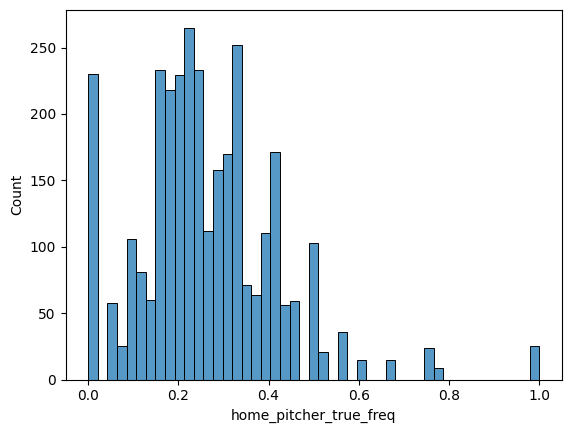

In [13]:
import seaborn as sns
sns.histplot(df_data["home_pitcher_true_freq"])


<Axes: >

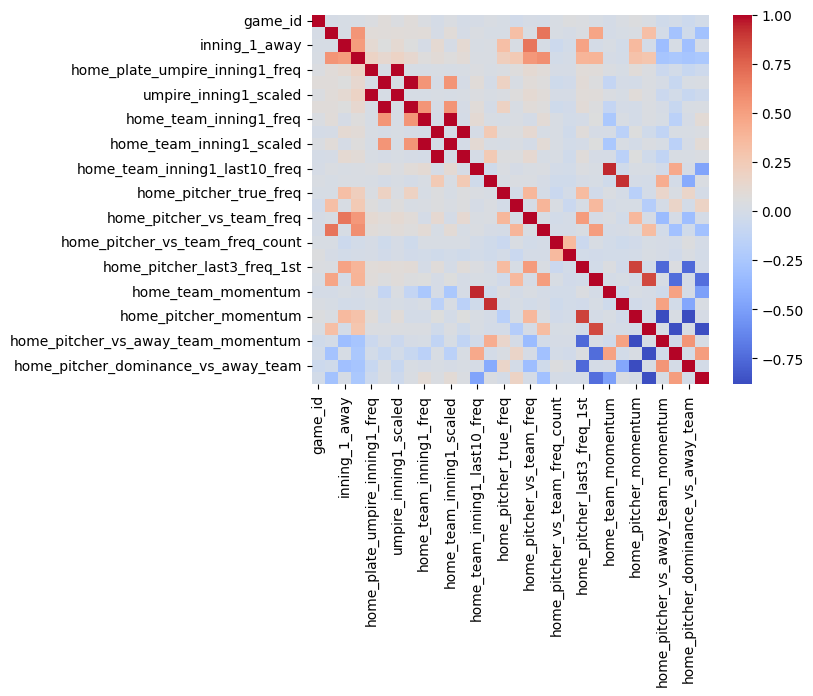

In [19]:
sns.heatmap(df_data.corr(numeric_only=True), cmap='coolwarm',fmt="")

In [20]:
import statsapi

def carreras_primer_inning(game_id):
    linescore = statsapi.get('game_linescore', {'gamePk': game_id})
    
    # Extrae las carreras por inning (visiting y home)
    innings = linescore.get('innings', [])
    if len(innings) == 0:
        return None  # No hay información (juego futuro o cancelado)

    primer_inning = innings[0]  # Primer inning

    # Revisa si anotaron
    carreras_visitante = primer_inning.get('away', {}).get('runs', 0)
    carreras_local = primer_inning.get('home', {}).get('runs', 0)

    return (carreras_visitante + carreras_local) > 0


In [22]:
df_2025 = pd.read_csv('./data/2025/mlb_games_2025_enriched.csv')
df_2025

,game_id,date,home_team,away_team,home_pitcher,away_pitcher,stadium,umpire,umpire_freq,stadium_freq,home_pitcher_freq,away_pitcher_freq,home_pitcher_vs_opp,away_pitcher_vs_opp,home_pitcher_last3,away_pitcher_last3,home_momentum,away_momentum
0,778563,2025-03-18,Chicago Cubs,Los Angeles Dodgers,Shota Imanaga,Yoshinobu Yamamoto,Tokyo Dome,Bill Miller,0.500000,0.000000,0.181818,0.166667,0.333333,0.0,0.333333,0.000000,-0.569536,-0.313008
1,778870,2025-03-18,Minnesota Twins,Detroit Tigers,Bailey Ober,Matt Manning,Lee Health Sports Complex,Andy Fletcher,0.575000,0.000000,0.363636,0.200000,0.250000,1.0,0.000000,0.333333,-0.397373,-0.313300
2,778564,2025-03-19,Chicago Cubs,Los Angeles Dodgers,Justin Steele,Roki Sasaki,Tokyo Dome,Alan Porter,0.432432,0.000000,0.153846,0.500000,0.000000,0.0,0.666667,0.666667,-0.569536,-0.313008
3,778768,2025-03-19,Boston Red Sox,Detroit Tigers,Richard Fitts,Casey Mize,JetBlue Park,Manny Gonzalez,0.421053,0.000000,0.000000,0.352941,0.000000,1.0,0.000000,0.000000,-0.767730,-0.313300
4,779058,2025-03-19,St. Louis Cardinals,Washington Nationals,Steven Matz,Jake Irvin,Roger Dean Chevrolet Stadium,David Rackley,0.363636,0.000000,0.333333,0.291667,0.000000,0.0,0.333333,0.666667,-0.201482,-0.137184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,776147,2025-09-28,Cleveland Guardians,Texas Rangers,NaN,NaN,Progressive Field,NaN,0.000000,0.466667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.566551,-0.491182
2232,776148,2025-09-28,Miami Marlins,New York Mets,NaN,NaN,loanDepot park,NaN,0.000000,0.553398,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.539356,-0.369866
2233,776144,2025-09-28,Milwaukee Brewers,Cincinnati Reds,NaN,NaN,American Family Field,NaN,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.409756,-0.398251
2234,776149,2025-09-28,Atlanta Braves,Pittsburgh Pirates,NaN,NaN,Truist Park,NaN,0.000000,0.504587,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.683173,-0.345591


In [25]:
carreras_primer_inning(778563)

False

In [26]:
linescore = statsapi.get('game_linescore', {'gamePk': 778563})

In [27]:
linescore

{'copyright': 'Copyright 2025 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
 'currentInning': 9,
 'currentInningOrdinal': '9th',
 'inningState': 'Bottom',
 'inningHalf': 'Bottom',
 'isTopInning': False,
 'scheduledInnings': 9,
 'innings': [{'num': 1,
   'ordinalNum': '1st',
   'home': {'runs': 0, 'hits': 0, 'errors': 0, 'leftOnBase': 1},
   'away': {'runs': 0, 'hits': 0, 'errors': 0, 'leftOnBase': 0}},
  {'num': 2,
   'ordinalNum': '2nd',
   'home': {'runs': 1, 'hits': 2, 'errors': 0, 'leftOnBase': 1},
   'away': {'runs': 0, 'hits': 0, 'errors': 0, 'leftOnBase': 2}},
  {'num': 3,
   'ordinalNum': '3rd',
   'home': {'runs': 0, 'hits': 1, 'errors': 0, 'leftOnBase': 1},
   'away': {'runs': 0, 'hits': 0, 'errors': 0, 'leftOnBase': 0}},
  {'num': 4,
   'ordinalNum': '4th',
   'home': {'runs': 0, 'hits': 0, 'errors': 0, 'leftOnBase': 0},
   'away': {'runs': 0, 'hits': 0, 'errors': 0, 'le

In [24]:
df_2025['target'] = df_2025['game_id'].apply(carreras_primer_inning)

KeyboardInterrupt: 